# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587SP25 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587SP25issues.json

In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import os

import warnings
warnings.filterwarnings('ignore')

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [3]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP25issues.json')]

In [4]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [5]:
# Sanity test: print rows in our DataFrame

issues_df
    

,issue_number,issue_title,issue_body,created_at,closed_at,labels,State,Author
0,493,Incorrect State Updates in Concurrent Mode,"When using React 18 in Concurrent Mode, state ...",2025-03-28,2025-03-28,"[Category:Bug, DetectionPhase:Testing, Origina...",closed,RSP25SCM17D
1,487,Incorrect Data Rendering in Angular Visualization,There is an issue with the rendering of data p...,2025-03-28,2025-03-28,"[Category:Bug, DetectionPhase:Testing, Origina...",closed,JSP25SCM19D
2,485,Unexpected behavior in form validation with as...,"""Body"": ""I'm encountering an issue where form ...",2025-03-28,None,"[Category:Inquiry, DetectionPhase:Field, Origi...",open,DSP25SCM12A
3,482,Bug: Change Detection Not Triggering on Async ...,"Description:\nIn Angular 17, when updating com...",2025-03-28,None,"[Category:Inquiry, DetectionPhase:Field, Origi...",open,DSP25SCM14K
4,481,Bug: React Component not updating state correc...,There is an issue with updating the state of a...,2025-03-28,None,"[Category:Inquiry, DetectionPhase:Field, Origi...",open,RSP25SCM46C
...,...,...,...,...,...,...,...,...
228,5,10 Labels,No Body for the Issue,2025-02-14,2025-02-14,[],closed,dhruvipatel-24
229,4,Test,No Body for the Issue,2025-02-14,2025-02-14,[],closed,dhruvipatel-24
230,3,Label 1,No Body for the Issue,2025-02-14,2025-02-14,[],closed,dhruvipatel-24
231,2,TestIssue_01,test description,2025-02-14,None,"[Category:Requirements, DetectionPhase:Testing...",open,SPM587SP25


In [6]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.nan
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.nan
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.nan
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.nan
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.nan


In [7]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,RSP25SCM17D,closed,2025-03-28,2025-03-28,493,"[Category:Bug, DetectionPhase:Testing, Origina...",NaN,NaN,NaN,NaN,NaN
1,JSP25SCM19D,closed,2025-03-28,2025-03-28,487,"[Category:Bug, DetectionPhase:Testing, Origina...",NaN,NaN,NaN,NaN,NaN
2,DSP25SCM12A,open,None,2025-03-28,485,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN
3,DSP25SCM14K,open,None,2025-03-28,482,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN
4,RSP25SCM46C,open,None,2025-03-28,481,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
228,dhruvipatel-24,closed,2025-02-14,2025-02-14,5,[],NaN,NaN,NaN,NaN,NaN
229,dhruvipatel-24,closed,2025-02-14,2025-02-14,4,[],NaN,NaN,NaN,NaN,NaN
230,dhruvipatel-24,closed,2025-02-14,2025-02-14,3,[],NaN,NaN,NaN,NaN,NaN
231,SPM587SP25,open,None,2025-02-14,2,"[Category:Requirements, DetectionPhase:Testing...",NaN,NaN,NaN,NaN,NaN


In [8]:
for i in range(0, len(wrangled_issues_df)):
    if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            if len(label.split(':')) == 2:
                label_name= (label.split(':'))[0]
                label_value= (label.split(':'))[1]
                wrangled_issues_df.loc[i, label_name]=label_value
 

In [9]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,RSP25SCM17D,closed,2025-03-28,2025-03-28,493,"[Category:Bug, DetectionPhase:Testing, Origina...",Requirements,Testing,Bug,Critical,Approved
1,JSP25SCM19D,closed,2025-03-28,2025-03-28,487,"[Category:Bug, DetectionPhase:Testing, Origina...",Requirements,Testing,Bug,Critical,Approved
2,DSP25SCM12A,open,None,2025-03-28,485,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,High,InProgress
3,DSP25SCM14K,open,None,2025-03-28,482,"[Category:Inquiry, DetectionPhase:Field, Origi...",Testing,Field,Inquiry,Medium,PendingReview
4,RSP25SCM46C,open,None,2025-03-28,481,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,High,InProgress
...,...,...,...,...,...,...,...,...,...,...,...
228,dhruvipatel-24,closed,2025-02-14,2025-02-14,5,[],NaN,NaN,NaN,NaN,NaN
229,dhruvipatel-24,closed,2025-02-14,2025-02-14,4,[],NaN,NaN,NaN,NaN,NaN
230,dhruvipatel-24,closed,2025-02-14,2025-02-14,3,[],NaN,NaN,NaN,NaN,NaN
231,SPM587SP25,open,None,2025-02-14,2,"[Category:Requirements, DetectionPhase:Testing...",Testing,Testing,Requirements,High,Completed


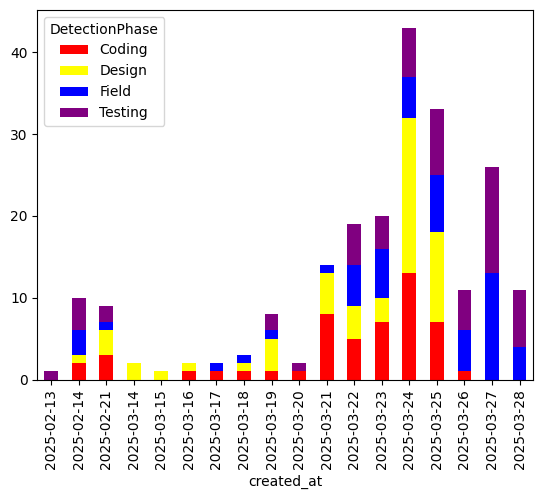

In [10]:
# Plot in Bar Chart the total number of issues created every day for every Detection Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green', 'pink'], grid=False)

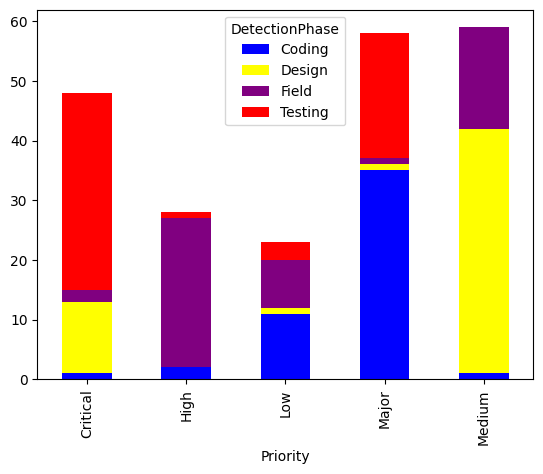

In [11]:
# Plot in Bar Chart the total number of issues created for every Phase based on their priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green', 'pink'], grid=False)

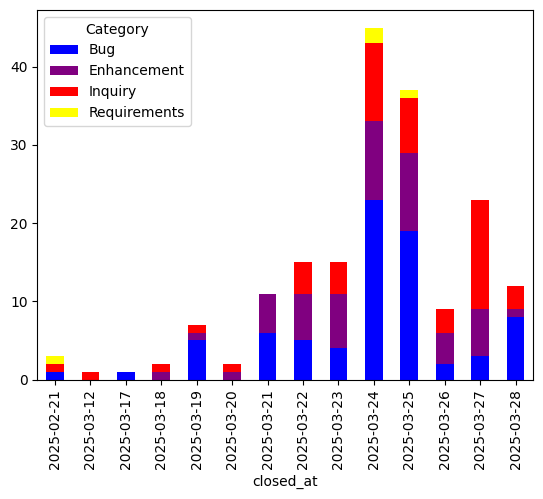

In [12]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green', 'pink'], grid=False)

#  Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase

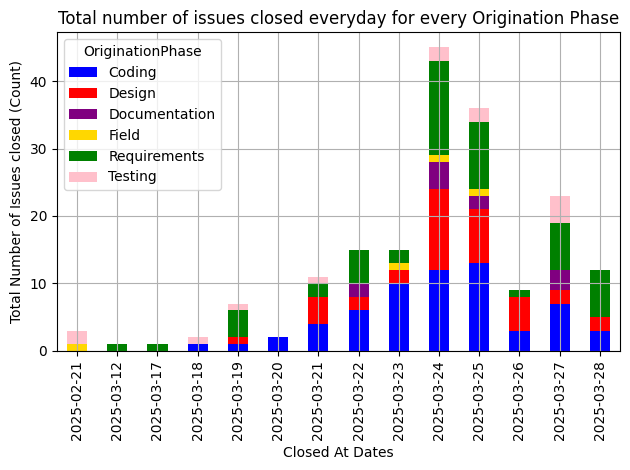

In [13]:
# Requirement #1: Add your code here
issuesClosedByOriginationPhase = wrangled_issues_df.groupby(['closed_at', 'OriginationPhase']).closed_at.count()

unstackedPlotForClosedAtAndOriginationPhase = issuesClosedByOriginationPhase.unstack().plot(kind="bar", stacked=True, color=['blue', 'red', 'purple', 'gold', 'green', 'pink'], grid=True) 

plt.title("Total number of issues closed everyday for every Origination Phase")
plt.xlabel("Closed At Dates")
plt.ylabel("Total Number of Issues closed (Count)")
plt.tight_layout()

#  Requirement #2: # Plot in Bar Chart the total number of issues created for every Phase based on their Status

<Figure size 2000x800 with 0 Axes>

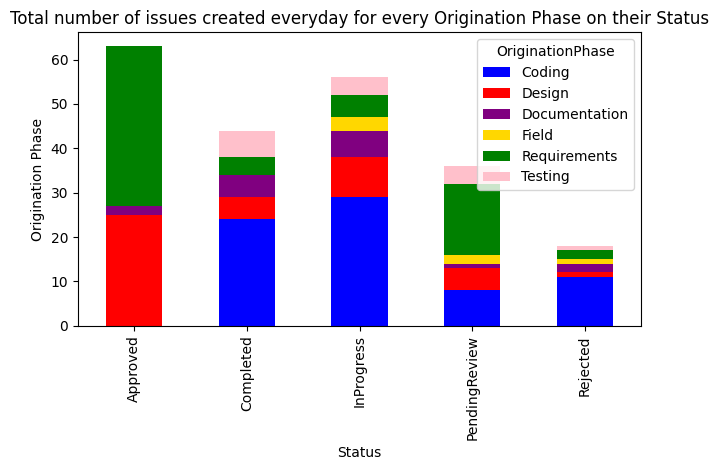

In [14]:
# Requirement #2: Add your code here

basedOnStatusAndOrigiationPhase = wrangled_issues_df.groupby(['Status', 'OriginationPhase']).created_at.count()

basedOnStatusAndOrigiationPhaseUnstacked = basedOnStatusAndOrigiationPhase.unstack()

plt.figure(figsize=(20,8))  

basedOnStatusAndOrigiationPhaseUnstacked.plot(kind = "bar", stacked=True, color=['blue', 'red', 'purple', 'gold', 'green', 'pink'])

plt.xlabel("Status")
plt.ylabel("Origination Phase")

plt.title("Total number of issues created everyday for every Origination Phase on their Status")
plt.tight_layout()

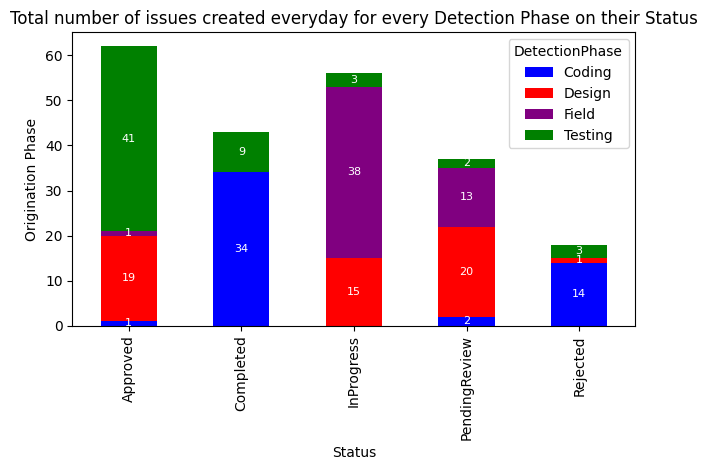

In [16]:
basedOnStatusAndDetectionPhase = wrangled_issues_df.groupby(['Status', 'DetectionPhase']).created_at.count()
basedOnStatusAndDetectionPhaseUnstacked = basedOnStatusAndDetectionPhase.unstack()

plottedStatusAndDetectionPhase = basedOnStatusAndDetectionPhaseUnstacked.plot(kind = "bar", stacked=True, color=['blue', 'red', 'purple',  'green', 'pink', 'gold'])

for bars in plottedStatusAndDetectionPhase.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0: 
            plottedStatusAndDetectionPhase.text(bar.get_x() + bar.get_width() / 2, 
                    bar.get_y() + height / 2, f"{int(height)}",
                    ha='center', va='center', fontsize=8, color='white')
            
plt.xlabel("Status")
plt.ylabel("Origination Phase")
plt.title("Total number of issues created everyday for every Detection Phase on their Status")
plt.tight_layout()